In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as snc 

In [ ]:
df=pd.read_csv("/content/Add_sales_data_2018.csv")
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [ ]:
df.mean()

Add1(in Thousands)       267.577561
Add2(in Thousands)       271.722439
Add3(in Thousands)       262.990732
Add4(in Thousands)       267.223902
Add5(in Thousands)       267.152683
Profit(in Thousands)    5059.630234
dtype: float64

In [ ]:
plt

In [ ]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [ ]:
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [ ]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [ ]:
c = df.corr()
c

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


1. **First of all, check whether there is any relationship between the amount
spent for advertising through five different companies and profit
generated.**

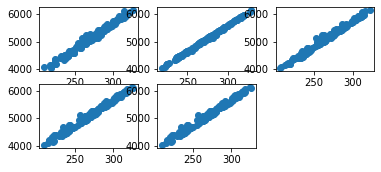

In [51]:
add_graphX =["Add1(in Thousands)","Add2(in Thousands)","Add3(in Thousands)","Add4(in Thousands)","Add5(in Thousands)"]
X = df[add_graphX]
add_graphY =["Profit(in Thousands)"]
Y = df[add_graphY]

plt.subplot(3,3,1)
plt.scatter(X['Add1(in Thousands)'],Y)

plt.subplot(3,3,2)
plt.scatter(X['Add2(in Thousands)'],Y)

plt.subplot(3,3,3)
plt.scatter(X['Add3(in Thousands)'],Y)

plt.subplot(3,3,4)
plt.scatter(X['Add4(in Thousands)'],Y)

plt.subplot(3,3,5)
plt.scatter(X['Add4(in Thousands)'],Y)



Which shows there is a strong correlation between the amount spent on advertising among five different companies and the profit generated.

**2. Build a regression model to predict the profit from the given data and
comment your findings on it.**


In [50]:
y=df['Profit(in Thousands)']
X=df.drop(['Date','Profit(in Thousands)'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)
from sklearn import linear_model
lmodel=linear_model.LinearRegression()
model=lmodel.fit(X_train,y_train)
predict=model.predict(X_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [47]:
print(predict)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


**3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**

In [55]:
from sklearn.metrics import mean_squared_error
new_input=[[290,312,309,298,320]]
new_output=model.predict(new_input)
print(' predicted profit is:',new_output)

 predicted profit is: [5820.06]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
